In [1]:
#import statements
import pandas as pd
import numpy as np

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
import sklearn.metrics as metrics




In [2]:
#opening data file
df = pd.read_csv("./data/kc_house_data.csv")

In [3]:
#taking a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

"waterfront", "view", and "yr_renovated" have some nulls.

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
print(df['waterfront'].isna().sum())
df['waterfront'].value_counts()

2376


NO     19075
YES      146
Name: waterfront, dtype: int64

In [6]:
na_waterfront = df[df['waterfront'].isna()]
na_waterfront

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,NONE,...,8 Good,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,NONE,...,7 Average,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,NONE,...,9 Better,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
55,9822700295,5/12/2014,885000.0,4,2.50,2830,5000,2.0,NaN,NONE,...,9 Better,2830,0.0,1995,0.0,98105,47.6597,-122.290,1950,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,NONE,...,8 Good,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,AVERAGE,...,9 Better,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,NONE,...,6 Low Average,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731


In [7]:
na_waterfront['view'].value_counts()

NONE         2110
AVERAGE       121
GOOD           73
FAIR           39
EXCELLENT      27
Name: view, dtype: int64

In [8]:
#comparing view values for waterfront = YES
yes_waterfront = df[df['waterfront']=="YES"]
yes_waterfront['view'].value_counts()

EXCELLENT    123
GOOD          14
AVERAGE        7
FAIR           1
Name: view, dtype: int64

Any property with a waterfront will have a non-NONE view. Since there are 2110 NONE views in our NA waterfront set, it seems safer to assume NO as the default for waterfront.

In [9]:
view_waterfront = df[(df['waterfront'].isna()) & (df['view'] == "NONE")]
view_waterfront

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,NONE,...,8 Good,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,NONE,...,7 Average,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,NONE,...,9 Better,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
55,9822700295,5/12/2014,885000.0,4,2.50,2830,5000,2.0,NaN,NONE,...,9 Better,2830,0.0,1995,0.0,98105,47.6597,-122.290,1950,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21567,2025049203,6/10/2014,399950.0,2,1.00,710,1157,2.0,NaN,NONE,...,7 Average,710,0.0,1943,0.0,98102,47.6413,-122.329,1370,1173
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,NONE,...,8 Good,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,NONE,...,6 Low Average,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731


In [10]:
df['waterfront'].fillna("NO", inplace=True)

In [11]:
print(df['yr_renovated'].isna().sum())
df['yr_renovated'].value_counts()

3842


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

The "yr_renovated" column has 3842 null values and thousands of 0.0 values. These 0.0 values might be an indicator for a house that has never been renovated.

In [12]:
df['yr_renovated'].fillna(0, inplace=True)

In [13]:
df['was_renovated'] = df['yr_renovated'] != 0.0

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,False
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,False
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,False
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,False


In [15]:
df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [17]:
renovation = df[df['yr_renovated'] > 0]
renovation['yr_renovated'].describe()

count     744.000000
mean     1995.928763
std        15.599946
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.250000
max      2015.000000
Name: yr_renovated, dtype: float64

In [18]:
#replace yr_renovated == 0 with the associated year in yr_built

df.loc[df['yr_renovated'] == 0, ['yr_renovated']] = df['yr_built']

In [19]:
df['yr_renovated'].value_counts()

2014.0    632
2005.0    479
2006.0    473
2004.0    455
2003.0    450
         ... 
1901.0     28
1902.0     26
1933.0     24
1935.0     20
1934.0     15
Name: yr_renovated, Length: 116, dtype: int64

In [20]:
#sanity check 
df[df['was_renovated'] == False]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,False
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,False
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,False
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,False
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,3890,1530.0,2001,2001.0,98053,47.6561,-122.005,4760,101930,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,2009.0,98103,47.6993,-122.346,1530,1509,False
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,2014.0,98146,47.5107,-122.362,1830,7200,False
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,2009.0,98144,47.5944,-122.299,1020,2007,False
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,1600,0.0,2004,2004.0,98027,47.5345,-122.069,1410,1287,False


In [21]:
df['was_renovated'].value_counts()

False    20853
True       744
Name: was_renovated, dtype: int64

In [22]:
print(df['view'].isna().sum())
df['view'].value_counts()

63


NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [23]:
null_view = df[df['view'].isna()]
null_view['waterfront'].value_counts()

NO     62
YES     1
Name: waterfront, dtype: int64

In [24]:
df['view'].fillna("NONE", inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [26]:
#sqft_basement is an object datatype
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1275.0        1
516.0         1
1548.0        1
2610.0        1
274.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [27]:
question_basement = df[df['sqft_basement'] == "?"]
question_basement

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,1715,?,1995,1995.0,98003,47.3097,-122.327,2238,6819,False
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,NO,NONE,...,1200,?,1921,1921.0,98002,47.3089,-122.210,1060,5095,False
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,NO,NONE,...,3595,?,2014,2014.0,98053,47.6848,-122.016,3625,5639,False
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,NO,NONE,...,3450,?,2002,2002.0,98010,47.3420,-122.025,3350,39750,False
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,NO,NONE,...,1160,?,1980,1980.0,98038,47.3624,-122.031,1540,11656,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,NO,NONE,...,1390,?,2008,2008.0,98103,47.6931,-122.330,2180,5009,False
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,NO,NONE,...,2330,?,2013,2013.0,98042,47.3590,-122.081,2300,3836,False
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NO,NONE,...,980,?,2008,2008.0,98117,47.6844,-122.387,980,1023,False
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,NO,NONE,...,2380,?,2010,2010.0,98023,47.2815,-122.356,2380,5396,False


In [28]:
df['sqft_basement2'] = df['sqft_living'] - df['sqft_above']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,False,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,False,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,False,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,False,0


In [29]:
df['sqft_basement2'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement2, Length: 306, dtype: int64

In [30]:
#454 counts of ? values for sqft_basement
#convert these to 0.0 
#df[df['sqft_basement'] == "?"] = "0.0"

#df['sqft_basement'] = df['sqft_basement'].replace("?", "0.0").astype(float)


In [31]:
#check that ? has been replaced with 0.0
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1275.0        1
516.0         1
1548.0        1
2610.0        1
274.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [32]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,False,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,False,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,False,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,False,0


In [33]:
check_zero_basement = df[df['sqft_basement'] == "700.0"]
check_zero_basement.shape

(208, 23)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   bedrooms        21597 non-null  int64  
 4   bathrooms       21597 non-null  float64
 5   sqft_living     21597 non-null  int64  
 6   sqft_lot        21597 non-null  int64  
 7   floors          21597 non-null  float64
 8   waterfront      21597 non-null  object 
 9   view            21597 non-null  object 
 10  condition       21597 non-null  object 
 11  grade           21597 non-null  object 
 12  sqft_above      21597 non-null  int64  
 13  sqft_basement   21597 non-null  object 
 14  yr_built        21597 non-null  int64  
 15  yr_renovated    21597 non-null  float64
 16  zipcode         21597 non-null  int64  
 17  lat             21597 non-null 

In [35]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [36]:
df['sqft_lot'].value_counts()

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

In [37]:
print(df['view'].isna().sum())
df['view'].value_counts()

0


NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [38]:
df['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [39]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1275.0        1
516.0         1
1548.0        1
2610.0        1
274.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [40]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [41]:
df['yr_renovated'].value_counts()

2014.0    632
2005.0    479
2006.0    473
2004.0    455
2003.0    450
         ... 
1901.0     28
1902.0     26
1933.0     24
1935.0     20
1934.0     15
Name: yr_renovated, Length: 116, dtype: int64

In [42]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [43]:
df[df['bedrooms'] > 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2
4092,1997200215,5/7/2014,599999.0,9,4.50,3830,6988,2.5,NO,NONE,...,1380.0,1938,1938.0,98103,47.6927,-122.338,1460,6291,False,1380
4231,2902200015,1/6/2015,700000.0,9,3.00,3680,4400,2.0,NO,NONE,...,850.0,1908,1908.0,98102,47.6374,-122.324,1960,2450,False,850
6073,9822700190,8/8/2014,1280000.0,9,4.50,3650,5000,2.0,NO,NONE,...,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000,True,1120
8537,424049043,8/11/2014,450000.0,9,7.50,4050,6504,2.0,NO,NONE,...,0.0,1996,1996.0,98144,47.5923,-122.301,1448,3866,False,0
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,NO,NONE,...,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,True,600
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,NO,AVERAGE,...,2090.0,2008,2008.0,98004,47.5861,-122.113,2730,10400,False,2090
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,NO,NONE,...,600.0,1958,1958.0,98006,47.5705,-122.175,2040,11914,False,600
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,580.0,1947,1947.0,98103,47.6878,-122.331,1330,4700,False,580
16830,8823900290,3/17/2015,1400000.0,9,4.00,4620,5508,2.5,NO,NONE,...,750.0,1915,1915.0,98105,47.6684,-122.309,2710,4320,False,750
18428,8823901445,3/13/2015,934000.0,9,3.00,2820,4480,2.0,NO,NONE,...,940.0,1918,1918.0,98105,47.6654,-122.307,2460,4400,False,940


In [44]:
df['bedrooms'] = df['bedrooms'].replace(33, 3)

In [45]:
df['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [46]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

There are multiple entries with the same id. These are probably the same properties under multiple transactions. We should check an example to see if this is the case.

In [47]:
#id = 795000620 appears 3 times in our dataset
multiple_id = df[df['id'] == 795000620]
multiple_id

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,...,0.0,1950,1950.0,98168,47.5045,-122.33,1070,6250,False,0
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,...,0.0,1950,1950.0,98168,47.5045,-122.33,1070,6250,False,0
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NO,NONE,...,0.0,1950,1950.0,98168,47.5045,-122.33,1070,6250,False,0


There are some differences in the entries with the same id. We can see the date is different as we should expect if every row is an individual transaction. The price is also different which makes sense. The "waterfront" column has both "NO" and NaN values, reinforcing the idea that we should treat NaN in that column as "NO". The "yr_renovated" column also shows the same behavior.

All nulls have been replaced with appropriate alternate values.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   bedrooms        21597 non-null  int64  
 4   bathrooms       21597 non-null  float64
 5   sqft_living     21597 non-null  int64  
 6   sqft_lot        21597 non-null  int64  
 7   floors          21597 non-null  float64
 8   waterfront      21597 non-null  object 
 9   view            21597 non-null  object 
 10  condition       21597 non-null  object 
 11  grade           21597 non-null  object 
 12  sqft_above      21597 non-null  int64  
 13  sqft_basement   21597 non-null  object 
 14  yr_built        21597 non-null  int64  
 15  yr_renovated    21597 non-null  float64
 16  zipcode         21597 non-null  int64  
 17  lat             21597 non-null 

In [49]:
#saved the cleaned dataframe to csv file
#df.to_csv('./data/kc_house_data_cleaned.csv', index_label = False)

In [50]:
df_cleaned = pd.read_csv('./data/kc_house_data_cleaned.csv')
df_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,False,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,False,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,False,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,False,0


In [51]:
df_cleaned.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'was_renovated',
       'sqft_basement2'],
      dtype='object')

## Examining Data Distributions

In [52]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

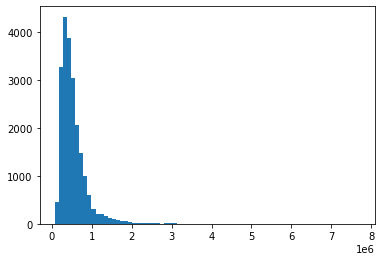

In [53]:
fig,ax = plt.subplots()
ax.hist(df['price'], bins = 75);

The histogram of price shows a right-skewed distribution.

We have several assumptions to check for linear regression.
* Linearity - check correlations/pairplot
* Multicolinearity
*
*

In [54]:
#correlations (Pearson's R value) between all columns of the dataframe
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2
id,1.000000,-0.016772,0.002342,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,0.020022,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.010621,-0.005193
price,-0.016772,1.000000,0.315954,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.097541,-0.053402,0.306692,0.022036,0.585241,0.082845,0.117543,0.323799
bedrooms,0.002342,0.315954,1.000000,0.527874,0.593182,0.033606,0.183721,0.492549,0.160748,0.169806,-0.158596,-0.011612,0.136574,0.404540,0.031898,0.018358,0.309244
bathrooms,0.005162,0.525906,0.527874,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.532389,-0.204786,0.024280,0.224903,0.569884,0.088303,0.046742,0.283440
sqft_living,-0.012241,0.701917,0.593182,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.339146,-0.199802,0.052155,0.241214,0.756402,0.184342,0.050829,0.435130
sqft_lot,-0.131911,0.089876,0.033606,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.051870,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.005091,0.015418
floors,0.018608,0.256804,0.183721,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.500721,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.003713,-0.245715
sqft_above,-0.010799,0.605368,0.492549,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.433434,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.020566,-0.052156
yr_built,0.021617,0.053953,0.160748,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,0.926406,-0.347210,-0.148370,0.409993,0.326377,0.070777,-0.202837,-0.133064
yr_renovated,0.020022,0.097541,0.169806,0.532389,0.339146,0.051870,0.500721,0.433434,0.926406,1.000000,-0.323968,-0.137445,0.386314,0.325529,0.069415,0.149986,-0.107093


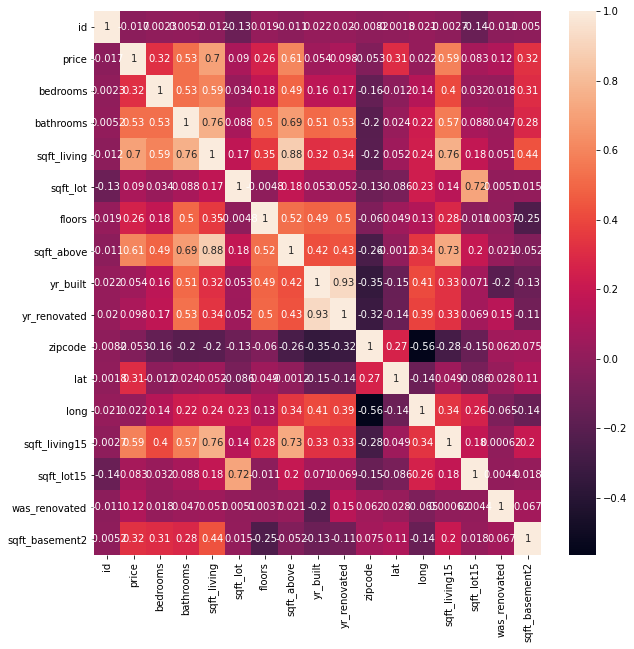

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True)

#mask = np.triu(np.ones_like(housing.corr(), dtype=bool))
#plt.figure(figsize=(20,10))
#cor = housing.corr().abs()
#sns.heatmap(cor, mask=mask, annot=True);


In [56]:
#simple model - sqft_living vs price
y = df['price']
x = df['sqft_living']
simple_model = sm.OLS(y, sm.add_constant(x))

In [57]:
simple_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        06:59:12   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

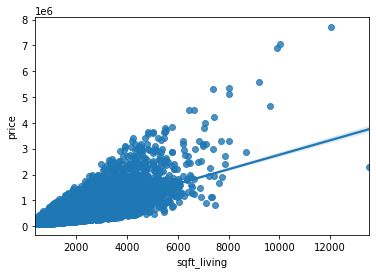

In [58]:
fig, ax = plt.subplots()
sns.regplot(x=x, y=y);

In [59]:
dummy_lr = DummyRegressor()

In [60]:
dummy_lr.fit(x,y)

DummyRegressor()

In [61]:
dummy_lr.score(x,y)

0.0

In [62]:
#multiple linear regression
#picked sqft_living, bedrooms, sqft_lot15
X = df[['sqft_living', 'bedrooms', 'sqft_lot15']]
y= df['price']
model2 = sm.OLS(y, sm.add_constant(X)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     7546.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        06:59:15   Log-Likelihood:            -2.9965e+05
No. Observations:               21597   AIC:                         5.993e+05
Df Residuals:                   21593   BIC:                         5.993e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.931e+04   6772.098     14.664      0.000     8.6e+04    1.13e+05
sqft_living   323.8841      2.415    134.124      0.000     319.151     328.617
bedrooms    -6.592e+04   2411.433    -27.337      0.000   -7.06e+04   -6.12e+04
sqft_lot15     -0.8242      0.065    -12.588      0.000      -0.953      -0.696
==============================================================================
Omnibus:                    14139.950   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           463759.481
Skew:                           2.668   Prob(JB):                         0.00
Kurtosis:                      25.066   Cond. No.                     1.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X.head()

,sqft_living,bedrooms,sqft_lot15
0,1180,3,5650
1,2570,3,7639
2,770,2,8062
3,1960,4,5000
4,1680,3,7503


In [64]:
np.mean(X)

sqft_living     2080.321850
bedrooms           3.371811
sqft_lot15     12758.283512
dtype: float64

In [65]:
np.std(X)

sqft_living      918.084869
bedrooms           0.904075
sqft_lot15     27273.810503
dtype: float64

In [66]:
X_scaled = (X - np.mean(X)) / np.std(X)

In [67]:
X_scaled

,sqft_living,bedrooms,sqft_lot15
0,-0.980652,-0.411261,-0.260627
1,0.533369,-0.411261,-0.187700
2,-1.427234,-1.517363,-0.172190
3,-0.131057,0.694841,-0.284459
4,-0.436040,-0.411261,-0.192686
...,...,...,...
21592,-0.599424,-0.411261,-0.412457
21593,0.250171,0.694841,-0.203796
21594,-1.154928,-1.517363,-0.394198
21595,-0.523178,-0.411261,-0.420597


In [68]:
scaled_model2 = sm.OLS(y, sm.add_constant(X_scaled)).fit()
scaled_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     7546.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        06:59:16   Log-Likelihood:            -2.9965e+05
No. Observations:               21597   AIC:                         5.993e+05
Df Residuals:                   21593   BIC:                         5.993e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.403e+05   1746.715    309.322      0.000    5.37e+05    5.44e+05
sqft_living  2.974e+05   2217.002    134.124      0.000    2.93e+05    3.02e+05
bedrooms     -5.96e+04   2180.117    -27.337      0.000   -6.39e+04   -5.53e+04
sqft_lot15  -2.248e+04   1785.747    -12.588      0.000    -2.6e+04    -1.9e+04
==============================================================================
Omnibus:                    14139.950   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           463759.481
Skew:                           2.668   Prob(JB):                         0.00
Kurtosis:                      25.066   Cond. No.                         2.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
ss = StandardScaler()

In [70]:
ss.fit(X)
X_scaled = ss.transform(X)

In [71]:
lr = LinearRegression()
lr.fit(X_scaled, y)

LinearRegression()

In [72]:
lr.score(X_scaled, y)

0.511826634525177

In [73]:
y_hat = lr.predict(X_scaled)
y_hat

array([279066.19793911, 727625.70131687, 210208.18288943, ...,
       296169.90874709, 418693.62595019, 296705.65709105])

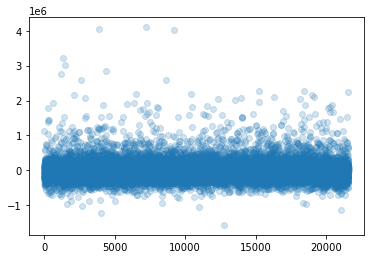

In [74]:
#observing residuals
resid = y - y_hat

fix, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]), y=resid, alpha = 0.2)

In [75]:
metrics.mean_squared_error(y, lr.predict(X_scaled))

65880509679.777374

## Setting up Train/Test Split

In [76]:
#set up train/test split with all columns except price for X and price column for y
X = df.drop(columns=['price'])
y= df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   bedrooms        21597 non-null  int64  
 4   bathrooms       21597 non-null  float64
 5   sqft_living     21597 non-null  int64  
 6   sqft_lot        21597 non-null  int64  
 7   floors          21597 non-null  float64
 8   waterfront      21597 non-null  object 
 9   view            21597 non-null  object 
 10  condition       21597 non-null  object 
 11  grade           21597 non-null  object 
 12  sqft_above      21597 non-null  int64  
 13  sqft_basement   21597 non-null  object 
 14  yr_built        21597 non-null  int64  
 15  yr_renovated    21597 non-null  float64
 16  zipcode         21597 non-null  int64  
 17  lat             21597 non-null 

In [78]:
numeric_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
              'floors', 'sqft_above', 'yr_built', 'yr_renovated', 
              'sqft_living15', 'sqft_lot15', 'sqft_basement2']

X_train_numeric, X_test_numeric = X_train[numeric_columns], X_test[numeric_columns]

In [79]:
dummy_lr = DummyRegressor()
dummy_lr.fit(X_train, y_train)
print(dummy_lr.score(X_train, y_train))

print(dummy_lr.score(X_test, y_test))

0.0

In [80]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [81]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [82]:
print(df['grade'].unique())

['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']


In [92]:
#df['grade_number'] = df['grade'].str.split(" ", expand=True)
#df['grade_number'] = df['grade_number'].astype(int)
#df['grade_number']

0             [7, Average]
1             [7, Average]
2        [6, Low, Average]
3             [7, Average]
4                [8, Good]
               ...        
21592            [8, Good]
21593            [8, Good]
21594         [7, Average]
21595            [8, Good]
21596         [7, Average]
Name: grade_number, Length: 21597, dtype: object

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   bedrooms        21597 non-null  int64  
 4   bathrooms       21597 non-null  float64
 5   sqft_living     21597 non-null  int64  
 6   sqft_lot        21597 non-null  int64  
 7   floors          21597 non-null  float64
 8   waterfront      21597 non-null  object 
 9   view            21597 non-null  object 
 10  condition       21597 non-null  object 
 11  grade           21597 non-null  object 
 12  sqft_above      21597 non-null  int64  
 13  sqft_basement   21597 non-null  object 
 14  yr_built        21597 non-null  int64  
 15  yr_renovated    21597 non-null  float64
 16  zipcode         21597 non-null  int64  
 17  lat             21597 non-null 

In [168]:
#grade_df = df.groupby(['grade_number'])
#grade_df.mean()

KeyError: 'grade_number'

In [169]:
#grade_list = df['grade_number'].unique()
#grade_list.sort()
#grade_list

NameError: name 'grade_list' is not defined

In [ ]:
#visualization of mean price grouped by grade (as number) 
fig, ax = plt.subplots(figsize = (10,10))

#ax.bar(grade_list, grade_df['price'].mean())

In [ ]:
#grade_df['sqft_living'].mean()

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))

#ax.bar(grade_list, grade_df['sqft_living'].mean())

In [170]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,False,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,False,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,False,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,False,0


In [94]:
#df.corr()['grade_number']

KeyError: 'grade_number'

In [95]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [96]:
df['condition']

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [ ]:
#condition_train = X_train['condition']
#ohe = OneHotEncoder(categories='auto', sparse=, handle_unknown='ignore')

In [83]:
#create dummy variables for the "condition" column
condition_dummies = pd.get_dummies(df['condition'], drop_first=True)
condition_dummies

,Fair,Good,Poor,Very Good
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
21592,0,0,0,0
21593,0,0,0,0
21594,0,0,0,0
21595,0,0,0,0


In [98]:
df = pd.concat([df, condition_dummies], axis=1)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2,grade_number,Fair,Good,Poor,Very Good
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,-122.257,1340,5650,False,0,"[7, Average]",0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,-122.319,1690,7639,True,400,"[7, Average]",0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,-122.233,2720,8062,False,0,"[6, Low, Average]",0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,-122.393,1360,5000,False,910,"[7, Average]",0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,-122.045,1800,7503,False,0,"[8, Good]",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,-122.346,1530,1509,False,0,"[8, Good]",0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,-122.362,1830,7200,False,0,"[8, Good]",0,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,-122.299,1020,2007,False,0,"[7, Average]",0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,-122.069,1410,1287,False,0,"[8, Good]",0,0,0,0


In [102]:
df[df['condition'] == "Good"].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,Fair,Good,Poor,Very Good
count,5.677000e+03,5.677000e+03,5677.000000,5677.000000,5677.000000,5.677000e+03,5677.000000,5677.000000,5677.000000,5677.000000,5677.000000,5677.000000,5677.000000,5677.000000,5677.000000,5677.000000,5677.0,5677.0,5677.0,5677.0
mean,4.457647e+09,5.213745e+05,3.357936,1.901092,1951.408843,1.602062e+04,1.261230,1591.044037,1958.350009,1959.232869,98072.506606,47.546742,-122.227599,1901.293641,13701.205038,360.364805,0.0,1.0,0.0,0.0
std,2.812022e+09,3.587960e+05,0.903430,0.686640,822.696818,4.178695e+04,0.415328,668.891265,22.975044,22.929896,55.626629,0.144500,0.124871,607.575282,25274.765524,478.238264,0.0,0.0,0.0,0.0
min,1.200019e+06,8.900000e+04,1.000000,0.500000,390.000000,8.330000e+02,1.000000,390.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.514000,399.000000,1062.000000,0.000000,0.0,1.0,0.0,0.0
25%,2.064801e+09,3.050000e+05,3.000000,1.500000,1370.000000,6.375000e+03,1.000000,1150.000000,1946.000000,1947.000000,98028.000000,47.439500,-122.332000,1470.000000,6370.000000,0.000000,0.0,1.0,0.0,0.0
50%,3.876100e+09,4.400000e+05,3.000000,1.750000,1820.000000,8.530000e+03,1.000000,1430.000000,1962.000000,1963.000000,98056.000000,47.566000,-122.226000,1780.000000,8400.000000,0.000000,0.0,1.0,0.0,0.0
75%,7.201800e+09,6.250000e+05,4.000000,2.500000,2350.000000,1.200000e+04,1.500000,1850.000000,1977.000000,1977.000000,98117.000000,47.671500,-122.149000,2220.000000,11000.000000,700.000000,0.0,1.0,0.0,0.0
max,9.842301e+09,7.700000e+06,10.000000,8.000000,12050.000000,1.651359e+06,3.000000,8570.000000,2009.000000,2015.000000,98199.000000,47.777600,-121.315000,5600.000000,425581.000000,3500.000000,0.0,1.0,0.0,0.0


In [104]:
lr_cat = LinearRegression()